In [1]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

from utils import *

import sys
sys.path.append("../")

# Shows files

In [2]:
config_names = ["MESSI+\nSAX+\nSIMD",
               #"MESSI+\nSFA+ED",
               "MESSI+\nSFA+ED+\nSIMD",
               #"MESSI+\nSFA+EW",
               "MESSI+\nSFA+EW+\nSIMD"]

        
path = "logs/MESSI_SFA_logs"
all_files = read_logs(log_type="tree", path=path, config_names = config_names)

Config logs/MESSI_SFA_logs/ASTRO/09
Queries 0 MESSI_TREE_2024_06_20_15:53:48.csv ASTRO - gruenau1 - CPUs 09 MESSI_TREE_2024_06_20_15:53:48.csv
Queries 1 MESSI_TREE_2024_06_20_15:58:12.csv ASTRO - gruenau1 - CPUs 09 MESSI_TREE_2024_06_20_15:58:12.csv
Queries 2 MESSI_TREE_2024_06_20_16:01:00.csv ASTRO - gruenau1 - CPUs 09 MESSI_TREE_2024_06_20_16:01:00.csv
Config logs/MESSI_SFA_logs/ASTRO/18
Queries 0 MESSI_TREE_2024_06_20_17:52:46.csv ASTRO - gruenau1 - CPUs 18 MESSI_TREE_2024_06_20_17:52:46.csv
Queries 1 MESSI_TREE_2024_06_20_17:57:55.csv ASTRO - gruenau1 - CPUs 18 MESSI_TREE_2024_06_20_17:57:55.csv
Queries 2 MESSI_TREE_2024_06_20_18:00:24.csv ASTRO - gruenau1 - CPUs 18 MESSI_TREE_2024_06_20_18:00:24.csv
Config logs/MESSI_SFA_logs/ASTRO/36
Queries 0 MESSI_TREE_2024_06_05_12:51:39.csv ASTRO - gruenau1 - CPUs 36 MESSI_TREE_2024_06_05_12:51:39.csv
Queries 1 MESSI_TREE_2024_06_05_12:55:09.csv ASTRO - gruenau1 - CPUs 36 MESSI_TREE_2024_06_05_12:55:09.csv
Queries 2 MESSI_TREE_2024_06_05_12:5

In [3]:
df_index = pd.DataFrame(columns=["subtrees","average depth","average leaf size"])

i = 0
for ds_name, files in all_files.items():
    df_all = pd.DataFrame()
    for name, file in files.items():
        # print(file)
        df = pd.read_csv(file)
        # display(df)
        
        df["method"] = name
        df["config"] = file.split("/")[3]
        df["dataset"] = file.split("/")[2]
        df_all = pd.concat([df_all, df], ignore_index=True)        
        df_index = pd.concat([
            df_index, 
            df[["method", "config", "dataset", "subtrees","average depth","average leaf size"]]], ignore_index=True)

        i = i+1
            

In [4]:
df_index

,subtrees,average depth,average leaf size,method,config,dataset
0,131,2.535709,10792.019277,MESSI+\nSAX+\nSIMD,09,ASTRO
1,30,2.086599,11362.368421,MESSI+\nSFA+ED+\nSIMD,09,ASTRO
2,56,2.326701,10266.726115,MESSI+\nSFA+EW+\nSIMD,09,ASTRO
3,131,2.535709,10792.019277,MESSI+\nSAX+\nSIMD,18,ASTRO
4,30,2.065926,11524.000000,MESSI+\nSFA+ED+\nSIMD,18,ASTRO
...,...,...,...,...,...,...
148,2,2.600000,12497.666667,MESSI+\nSFA+ED+\nSIMD,18,TXED
149,68,6.148384,4645.326709,MESSI+\nSFA+EW+\nSIMD,18,TXED
150,10,3.090159,7667.111111,MESSI+\nSAX+\nSIMD,36,TXED
151,2,2.600000,13926.833333,MESSI+\nSFA+ED+\nSIMD,36,TXED


In [5]:
subset = df_index.rename(columns={
    "method":"Method",
    "subtrees":"Subtrees", 
    "average depth": "Average Depth",
    "average leaf size" : "Average Leaf Size"})

subset = subset[df_index.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]

subset.Method.replace("MESSI+\nSAX+\nSIMD", "MESSI 1.0", inplace=True)
subset.Method.replace("MESSI+\nSFA+EW+\nSIMD", "MESSI 2.0", inplace=True)

subset

,Subtrees,Average Depth,Average Leaf Size,Method,config,dataset
0,131,2.535709,10792.019277,MESSI 1.0,09,ASTRO
2,56,2.326701,10266.726115,MESSI 2.0,09,ASTRO
3,131,2.535709,10792.019277,MESSI 1.0,18,ASTRO
5,56,2.326701,10266.726115,MESSI 2.0,18,ASTRO
6,131,2.535709,10792.019277,MESSI 1.0,36,ASTRO
...,...,...,...,...,...,...
146,84,6.061777,4826.290223,MESSI 2.0,09,TXED
147,10,3.090159,7667.111111,MESSI 1.0,18,TXED
149,68,6.148384,4645.326709,MESSI 2.0,18,TXED
150,10,3.090159,7667.111111,MESSI 1.0,36,TXED


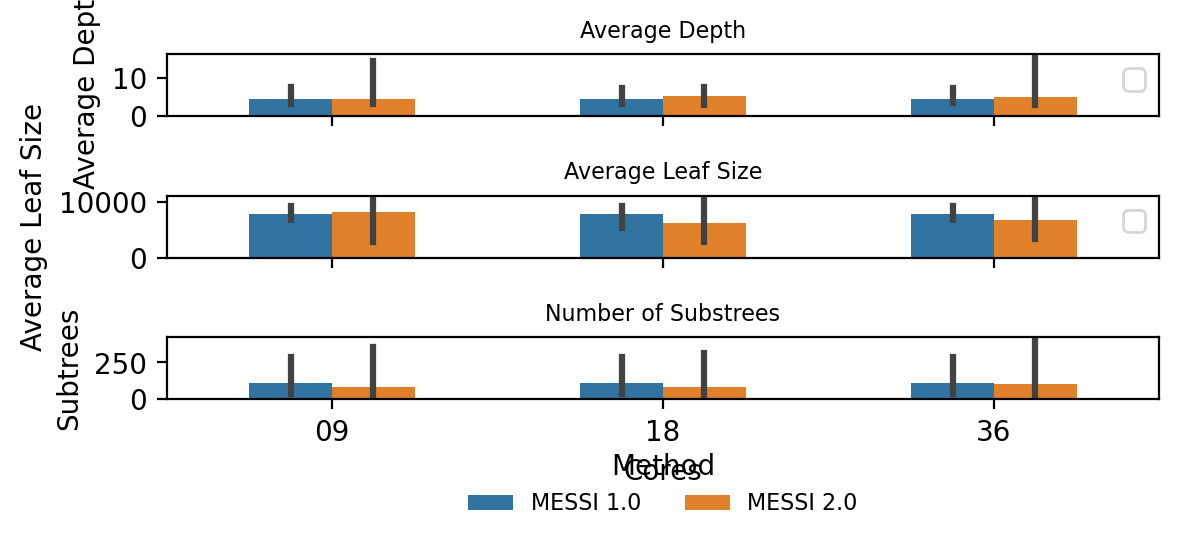

In [63]:
fig, ax = plt.subplots(3,1, figsize=(6,3), sharex=True)

sns.barplot(x="config", y="Average Depth", hue="Method", data=subset, ax=ax[0], estimator=np.median, width=.5)
ax[0].set_title("Average Depth", size=8)

sns.barplot(x="config", y="Average Leaf Size", hue="Method", data=subset, ax=ax[1], estimator=np.median, width=.5)
ax[1].set_title("Average Leaf Size", size=8)

sns.barplot(x="config", y="Subtrees", hue="Method", data=subset, ax=ax[2], estimator=np.median, width=.5)
ax[2].set_title("Number of Substrees", size=8)

# fig.subplots_adjust(top=0.9)
# fig.suptitle("Average Depth", y=1.05, size=14)

ax[-1].set_xlabel("Cores")

ax[0].legend([])
ax[1].legend([])
sns.move_legend(ax[2], "upper center", frameon=False, bbox_to_anchor=(.5, -0.55), ncol=4, fontsize=8)
# sns.move_legend(ax[0], "upper right", bbox_to_anchor=(0,0))
# plt.figlegend(lines, labels, loc = 'upper right', ncol=5, labelspacing=0.)


plt.tight_layout()
plt.savefig("images/experiment_index_props.pdf", bbox_inches='tight')